In [16]:
import CIE
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt

air = ml.Non_Dispersion(1)
SiO2 = ml.open_material('SiO2_Nanya', 'Material')
NB = ml.open_material('Nb2O5_Nanya', 'Material')
ITO2 = ml.open_material('ITO_Nanya', 'Material')
ITO1 = ml.open_material('ITO1_Nanya', 'Material')
OC = ml.open_material('OC_Nanya', 'Material')
sodalime_Nanya = ml.open_material('sodalime_Nanya', 'Material')

In [3]:
wl = np.linspace(400, 700, 301)
f1 = [70,28,40,6,]
f3 = [68,27,37,6]
m1 = [75,30,45,8]
m2 = [74.51206025,33.,37.,5.82975511]
m6 = [68.12613258,27.0826258,37.14644295,5.7344349 ]

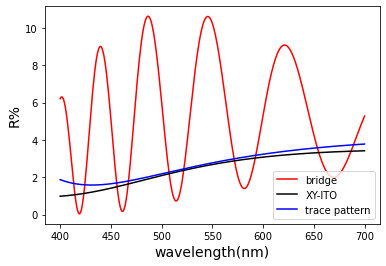

bridge: 5.160130167869267
xy-ITO: 2.4593162756603943
pattern: 2.6849659872433653
delta_d_t: 0.22564971158297067
delta_d_b: 3.233811147102664
bridge: (28.837274107906367, -2.252578977233799, 4.346118684832135)
xy-ITO: (18.780302769406084, 1.0653907988999456, 11.332910160677685)
pattern: (19.30833016326924, 2.046895355443196, 9.258027960685233)


In [17]:
tk = m6

wl = np.linspace(380, 780, 401)
wl1 = np.linspace(400, 700, 301)
hypo_bri = lambda th: tm.Design(
    [air, SiO2, ITO2, OC, ITO1, SiO2, NB, sodalime_Nanya],
    [None, th[0], th[1], 1400, 70, th[2], th[3], None]
).reflectance(wl1)

hypo_dia = lambda th: tm.Design(
    [air, SiO2, ITO2, SiO2, NB, sodalime_Nanya],
    [None, th[0], th[1], th[2], th[3], None]
).reflectance(wl1)

hypo_tra = lambda th: tm.Design(
    [air, SiO2, SiO2, NB, sodalime_Nanya],
    [None, th[0],th[2], th[3], None]
).reflectance(wl1)

plt.plot(wl1, 100*hypo_bri(tk), '-r', label = 'bridge')
plt.plot(wl1, 100*hypo_dia(tk), '-k', label = 'XY-ITO')
plt.plot(wl1, 100*hypo_tra(tk), '-b', label = 'trace pattern')
plt.xlabel('wavelength(nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
#plt.savefig('Nanya_Bonsai_sim.png')
plt.show()

print('bridge:',100*np.mean(hypo_bri(tk)))
print('xy-ITO:',100*np.mean(hypo_dia(tk)))
print('pattern:',100*np.mean(hypo_tra(tk)))
print('delta_d_t:',np.mean(abs(100*hypo_tra(tk)-100*hypo_dia(tk))))
print('delta_d_b:',np.mean(abs(100*hypo_bri(tk)-100*hypo_dia(tk))))
print('bridge:',CIE.Lab(hypo_bri(tk)))
print('xy-ITO:',CIE.Lab(hypo_dia(tk)))
print('pattern:',CIE.Lab(hypo_tra(tk)))

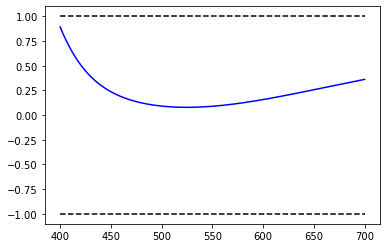

In [13]:
plt.plot(wl1, 100*hypo_tra(tk)-100*hypo_dia(tk), '-b')
plt.plot(wl1, -np.ones(np.size(wl1)),'--k')
plt.plot(wl1, np.ones(np.size(wl1)),'--k')
#plt.savefig('Nanya_Bonsai_sim_delta_d_t.png')
plt.show()

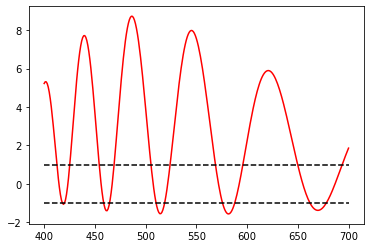

In [15]:
plt.plot(wl1, 100*hypo_bri(tk)-100*hypo_dia(tk), '-r')
plt.plot(wl1, -np.ones(np.size(wl1)),'--k')
plt.plot(wl1, np.ones(np.size(wl1)),'--k')
#plt.savefig('Nanya_Bonsai_sim_delta_d_b.png')
plt.show()